# TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

## TASK 1: Data Exploration and Preprocessing

In [1]:
#LOAD DATA 
import pandas as pd
df=pd.read_csv('blogs.csv')
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [2]:
# exploratory data analysis to understand its structure and content.
#checking null values
df.isnull().sum() # no null values found

Data      0
Labels    0
dtype: int64

In [3]:
#creating a new column for length of the data
df['len']=df['Data'].apply(len)
df

,Data,Labels,len
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,5972
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1336
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,3116
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,15910
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,3264
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc,5263
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,1771
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc,2192
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc,3197


array([[<Axes: title={'center': 'len'}>]], dtype=object)

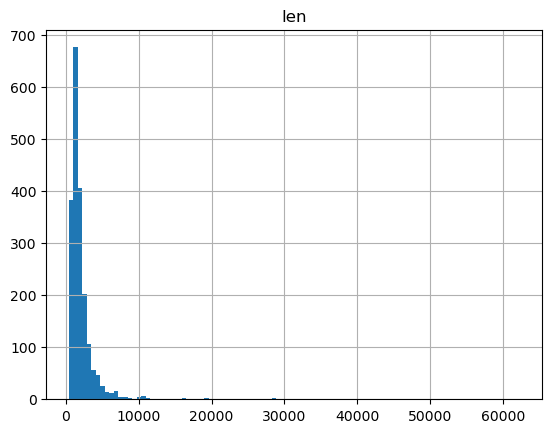

In [4]:
# histogram shows the overall distribution of blog post lengths.
df.hist(bins=100)

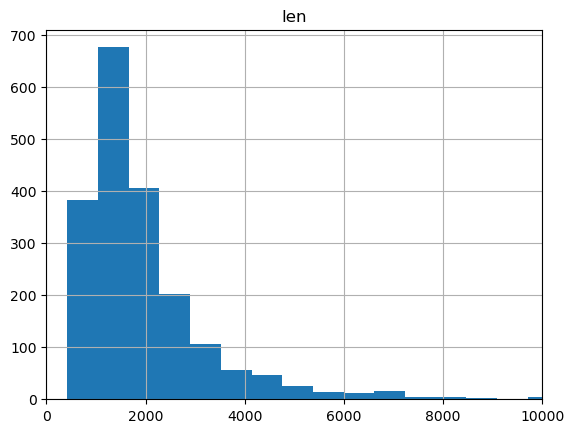

In [41]:
# ZOOMED PLOT WITH MAATPLOT
import matplotlib.pyplot as plt
df.hist(bins=100)
plt.xlim(0, 10000)
plt.show()
# WE can observe trends such as the most common blog post length, the presence of outliers, 
# and the general shape of the distribution (skewed).

array([[<Axes: title={'center': 'alt.atheism'}>,
        <Axes: title={'center': 'comp.graphics'}>,
        <Axes: title={'center': 'comp.os.ms-windows.misc'}>,
        <Axes: title={'center': 'comp.sys.ibm.pc.hardware'}>],
       [<Axes: title={'center': 'comp.sys.mac.hardware'}>,
        <Axes: title={'center': 'comp.windows.x'}>,
        <Axes: title={'center': 'misc.forsale'}>,
        <Axes: title={'center': 'rec.autos'}>],
       [<Axes: title={'center': 'rec.motorcycles'}>,
        <Axes: title={'center': 'rec.sport.baseball'}>,
        <Axes: title={'center': 'rec.sport.hockey'}>,
        <Axes: title={'center': 'sci.crypt'}>],
       [<Axes: title={'center': 'sci.electronics'}>,
        <Axes: title={'center': 'sci.med'}>,
        <Axes: title={'center': 'sci.space'}>,
        <Axes: title={'center': 'soc.religion.christian'}>],
       [<Axes: title={'center': 'talk.politics.guns'}>,
        <Axes: title={'center': 'talk.politics.mideast'}>,
        <Axes: title={'center': 'ta

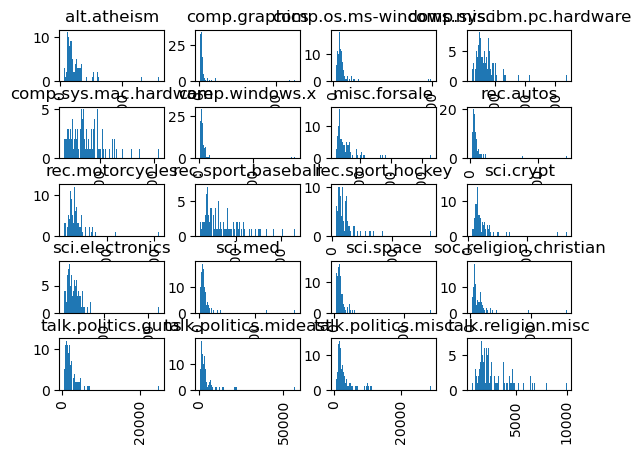

In [5]:
df.hist('len',by='Labels',bins=100)

In [ ]:
#Comparison by Label:
#- histograms allow for comparison of blog post length distributions across different label categories.
# - certain label categories tend to have longer or shorter blog posts on average.
#  - we observe potential differences in the writing styless wrt with different labels.

### Preprocess the data

In [6]:
#import nltk library and checking required libraries spacy , wordcloud, punkt, stopwords
import nltk
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\dekrk\AppData\Roaming\nltk_data...
[

[nltk_data]    |   Package maxent_ne_chunker is already up-to-date!
[nltk_data]    | Downloading package maxent_treebank_pos_tagger to
[nltk_data]    |     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]    |   Package maxent_treebank_pos_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package moses_sample to
[nltk_data]    |     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]    |   Package moses_sample is already up-to-date!
[nltk_data]    | Downloading package movie_reviews to
[nltk_data]    |     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]    |   Package movie_reviews is already up-to-date!
[nltk_data]    | Downloading package mte_teip5 to
[nltk_data]    |     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mte_teip5 is already up-to-date!
[nltk_data]    | Downloading package mwa_ppdb to
[nltk_data]    |     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]    |   Package mwa_ppdb is already

[nltk_data]    |   Package timit is already up-to-date!
[nltk_data]    | Downloading package toolbox to
[nltk_data]    |     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]    |   Package toolbox is already up-to-date!
[nltk_data]    | Downloading package treebank to
[nltk_data]    |     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]    |   Package treebank is already up-to-date!
[nltk_data]    | Downloading package twitter_samples to
[nltk_data]    |     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]    |   Package twitter_samples is already up-to-date!
[nltk_data]    | Downloading package udhr to
[nltk_data]    |     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr is already up-to-date!
[nltk_data]    | Downloading package udhr2 to
[nltk_data]    |     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]    |   Package udhr2 is already up-to-date!
[nltk_data]    | Downloading package unicode_samples to
[nltk_data]    |     C:\U

True

In [7]:
!pip install spacy

In [8]:
!pip install wordcloud

In [9]:
!python -m spacy download en_core_web_sm

     ---------------------------------------- 0.0/12.8 MB ? eta -:--:--
     - -------------------------------------- 0.3/12.8 MB 7.0 MB/s eta 0:00:02
     --- ------------------------------------ 1.1/12.8 MB 9.9 MB/s eta 0:00:02
     ----- ---------------------------------- 1.8/12.8 MB 10.6 MB/s eta 0:00:02
     -------- ------------------------------- 2.7/12.8 MB 11.6 MB/s eta 0:00:01
     ------------- -------------------------- 4.4/12.8 MB 14.9 MB/s eta 0:00:01
     ------------------ --------------------- 5.8/12.8 MB 16.8 MB/s eta 0:00:01
     ---------------------- ----------------- 7.1/12.8 MB 18.1 MB/s eta 0:00:01
     -------------------------- ------------- 8.4/12.8 MB 19.2 MB/s eta 0:00:01
     ------------------------------ --------- 9.7/12.8 MB 19.9 MB/s eta 0:00:01
     --------------------------------- ----- 10.9/12.8 MB 22.6 MB/s eta 0:00:01
     ------------------------------------- - 12.3/12.8 MB 27.3 MB/s eta 0:00:01
     --------------------------------------  12.8/

In [10]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
import re
import nltk
from nltk.corpus import stopwords

## Perform feature extraction to convert text data 

In [13]:
# Define a function to preprocess text
def preprocess_text(text):
    # Convert text to lowercase
    text = text.lower()
    # Remove punctuation
    text = re.sub(r'[^\w\s]', '', text)
    # Tokenization
    tokens = nltk.word_tokenize(text)
    # Remove stopwords
    stopwords_list = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stopwords_list]
    # Join tokens back into text
    text = ' '.join(tokens)
    return text

In [14]:
#Apply text preprocessing to the 'text' column
df['cleaned_text']=df['Data'].apply(preprocess_text)

In [15]:
#Feature extraction using TF-IDF
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_vec=TfidfVectorizer(max_features=5000)
tfidf_vec

TfidfVectorizer(max_features=5000)

In [16]:
a=tfidf_vec.fit_transform(df['cleaned_text'])
a

<2000x5000 sparse matrix of type '<class 'numpy.float64'>'
	with 187389 stored elements in Compressed Sparse Row format>

In [18]:
b=df['Labels']
b

0              alt.atheism
1              alt.atheism
2              alt.atheism
3              alt.atheism
4              alt.atheism
               ...        
1995    talk.religion.misc
1996    talk.religion.misc
1997    talk.religion.misc
1998    talk.religion.misc
1999    talk.religion.misc
Name: Labels, Length: 2000, dtype: object

In [21]:
# splitting the data into training and testing data
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(a,b,test_size=0.75,random_state=69)

In [22]:
print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

(500, 5000)
(500,)
(1500, 5000)
(1500,)


## TASK 2: Naive Bayes Model for Text Classification

In [23]:
#using NaiveBayes algorithma
from sklearn.naive_bayes import MultinomialNB
naive_bayes=MultinomialNB()

In [24]:
#Train the model on the training set and make predictions on the test set.
naive_bayes.fit(x_train,y_train)

MultinomialNB()

In [26]:
# predicting the data
y_pred=naive_bayes.predict(x_test)
y_pred

array(['sci.med', 'rec.motorcycles', 'sci.space', ..., 'rec.motorcycles',
       'rec.motorcycles', 'rec.motorcycles'], dtype='<U24')

In [27]:
#  finding performance metrics using accuracy score,precision,recall and f1 score
from sklearn.metrics import accuracy_score,classification_report
accuracy_score(y_test,y_pred)    

0.44066666666666665

In [28]:
classification_report(y_test,y_pred)

'                          precision    recall  f1-score   support\n\n             alt.atheism       0.88      0.09      0.16        79\n           comp.graphics       0.85      0.22      0.35        77\n comp.os.ms-windows.misc       0.57      0.73      0.64        75\ncomp.sys.ibm.pc.hardware       0.67      0.02      0.05        83\n   comp.sys.mac.hardware       1.00      0.07      0.14        81\n          comp.windows.x       1.00      0.10      0.19        78\n            misc.forsale       0.81      0.47      0.59        75\n               rec.autos       1.00      0.31      0.47        74\n         rec.motorcycles       0.09      0.97      0.16        64\n      rec.sport.baseball       0.95      0.50      0.65        74\n        rec.sport.hockey       0.93      0.78      0.85        73\n               sci.crypt       0.97      0.49      0.66        77\n         sci.electronics       0.42      0.45      0.44        71\n                 sci.med       0.94      0.45      0.61    

## TASK 3. Sentiment Analysis

In [29]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [30]:
!python -m nltk.downloader vader_lexicon

C:\Users\dekrk\anaconda3\lib\runpy.py:127: RuntimeWarning: 'nltk.downloader' found in sys.modules after import of package 'nltk', but prior to execution of 'nltk.downloader'; this may result in unpredictable behaviour
  warn(RuntimeWarning(msg))
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\dekrk\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


In [31]:
#sentiment Analysis
sent_analy=SentimentIntensityAnalyzer()

In [32]:
sentiments=[]
for text in df['Data']:
  sentiment_scr=sent_analy.polarity_scores(text)
  if sentiment_scr['compound']>0:
    sentiments.append('positive+ve')
  elif sentiment_scr['compound']<0:
    sentiments.append('negative-ve')
  else:
    sentiments.append('neutral')

In [33]:
# adding sentiments to the data
df['sentiment']=sentiments

In [35]:
#Examining the distribution of sentiments
sentiment_dist=df.groupby(['Labels','sentiment']).size().unstack(fill_value=0)
print("\n sentiment Distribution Across Categories:")
print(sentiment_dist)


 sentiment Distribution Across Categories:
sentiment                 negative-ve  neutral  positive+ve
Labels                                                     
alt.atheism                        42        1           57
comp.graphics                      13        4           83
comp.os.ms-windows.misc            24        2           74
comp.sys.ibm.pc.hardware           21        0           79
comp.sys.mac.hardware              24        3           73
comp.windows.x                     20        2           78
misc.forsale                        7        8           85
rec.autos                          27        1           72
rec.motorcycles                    30        2           68
rec.sport.baseball                 27        1           72
rec.sport.hockey                   28        1           71
sci.crypt                          29        0           71
sci.electronics                    18        4           78
sci.med                            38        1          

## TASK 4: Evaluation of  Naive Bayes classifier performance using metrics such as accuracy, precision, recall, and F1-score.

In [36]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [37]:
# Naive Bayes Classifier and performance metrics
accuracy_scr=accuracy_score(y_test,y_pred)
accuracy_scr

0.44066666666666665

In [38]:
precision_scr=precision_score(y_test,y_pred,average='weighted')
precision_scr

0.8045595483982676

In [39]:
recall_scr=recall_score(y_test,y_pred,average='weighted')
recall_scr

0.44066666666666665

In [40]:
f1_scr=f1_score(y_test,y_pred,average="weighted")
f1_scr

0.47600863586883435